In [1]:
import os
import cv2
from imutils import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
path='F:\Dataset\project dataset'

In [3]:
#labels =set(['A','B','C'])
pathToImage =list(paths.list_images(path))
#print(pathToImage)
data =[]
labels =[]
for images in pathToImage:
    label=images.split(os.path.sep)[-2]
    #print(label)
    image =cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
    #plt.figure()

In [4]:
# Total number of images and labels
print('Total number of images',len(data))
print('Total number of labels',len(set(labels)))
print("Labels: ",[X for X in set(labels)])

Total number of images 150
Total number of labels 3
Labels:  ['A', 'C', 'B']


In [ ]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(data[i])
    plt.title(labels[i])

In [16]:
blur_img=[]
for img in data:
    Gaussian_blur=cv2.GaussianBlur(img,(5,5),0)
    blur_img.append(Gaussian_blur)

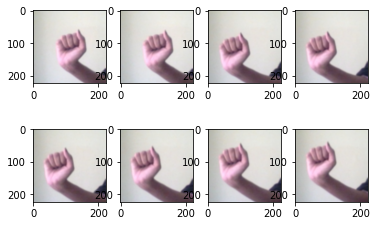

In [18]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(blur_img[i])

img_HSV = cv2.cvtColor(blur_img[i], cv2.COLOR_BGR2HSV)
cv2.imshow("HSV Image",img_HSV)
cv2.imshow("HSV Channel",img_HSV[:,:,0])
cv2.imshow("HSV Saturation",img_HSV[:,:,1])
cv2.imshow("HSV Value",img_HSV[:,:,2])

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    

In [14]:
data =np.array(data)
labels =np.array(labels)
# encoding
#lb = preprocessing.LabelBinarizer()
#labels = lb.fit_transform(labels)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2,stratify =labels,random_state =42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_test.shape[0]

In [ ]:
x_train =x_train/255
x_test = x_test/255

In [ ]:
x_test.shape

In [ ]:
lb = preprocessing.LabelBinarizer()
y_train =lb.fit_transform(y_train)
y_test =lb.fit_transform(y_test)

In [ ]:
x_test.shape,y_test.shape


In [ ]:
#CNN
# 1st sequential for forward and backoard propogation
model = models.Sequential()
#adding convolution layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3),padding ='same'))
#max pooling
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
# Drop_out
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

In [ ]:
# now flatten 
model.add(layers.Flatten())
# fully connected neural network
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [ ]:
model.summary()


In [ ]:
x_train.shape,y_train.shape


In [ ]:
x_test.shape,y_test.shape


In [ ]:
# complie and train model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
'''# keras tuner
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model'''

In [ ]:
'''from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters'''

In [ ]:
'''tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="sign_language")'''

In [ ]:
'''tuner_search.search(x_train,train_label,epochs=3,validation_split=0.1)'''


In [ ]:
x_test.shape


In [ ]:
y_test.shape


In [ ]:
score = model.evaluate(x_test, y_test,batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
y_predict=model.predict(x_test)
print(y_predict)
y_result  =np.argmax(y_predict,axis =1)
print(y_result)
y_test=np.argmax(y_test,axis =1)

In [ ]:
print(y_result)


In [ ]:
plt.imshow(x_test[0])


In [ ]:
from sklearn.metrics import classification_report as cr,accuracy_score,confusion_matrix
cm =confusion_matrix(y_test,y_result)
sns.heatmap(cm,annot =True)
print("accuracy_score",accuracy_score(y_test,y_result))
print()
print('confusion_matrix',cr(y_test,y_result))

In [ ]:
y_test


In [ ]:
path_a=r'C:\Users\dell\Downloads\TEST_DATA\A-samples\3.jpg'


In [ ]:
img_1 =cv2.imread(path_a)
print(img_1)
img_2= cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
img_2=cv2.resize(img_2,(224,224))
img_2 =img_2/225
new_image = tf.expand_dims(img_2,0)
print(img_2)
print(new_image)
plt.imshow(img_2)

In [ ]:
blur_img=[]
for img in data1:
    Gausain_blur=cv2.Goussin_blur(img,(5,5),0)
    blur_img.apprnd(Goussin_blur)

In [ ]:
for i in range(8):
    plt.subplot(2,3,i+1)
    plt.imshow(blur_img[i])